# Udacity Data Analysis Nanodegree :
## project : Wrangle and Analyse Data

### Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#Gather">Gather</a></li>
<li><a href="#Assess">Assess</a></li>
<li><a href="#Clean">Clean</a></li>
<li><a href="#Analysis">Analysis</a></li>
</ul>


# Introduction
in this project we will wrangle and analyse the tweet archive of Twitter user @dog_rates, who also known as WeRateDogs. the tweet archive of this user contain only basic information so we need to gather more data then assess the data and clean it .

# Gather 

In [153]:
#import libraries 
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
#the first source of data by use read_csv()
twitter_archive_df= pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive_df


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [5]:
# the second source of data by use request on URL 
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response= requests.get(url)
with open ('image_predictions.tsv', 'wb') as file:
    file.write(response.content)
image_predictions_df =pd.read_csv('image_predictions.tsv', sep='\t')


In [6]:
image_predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [7]:
# the third source of data by use tweet-json.txt file
tweets_list=[]
with open('tweet_json.txt','r', encoding = 'utf-8') as file:

    line=file.readline()
    
    #if there there is no line line variable will be NaN and the loop will stop
    while line :
        
        #Decoding JSON
        tweet = json.loads(line)
        
        #extract the data from tweet 
        tweet_id = tweet['id']
        tweet_retweet_count = tweet['retweet_count']
        tweet_favorite_count = tweet['favorite_count']
      
        
        # create a dictionary and add the data in it
        json_tweet = {'tweet_id':tweet_id, 'retweet_count': tweet_retweet_count,
                      'favorite_count': tweet_favorite_count}
        tweets_list.append(json_tweet)
        
        #to keep check if there is line 
        line= file.readline()
        
        
#create tweet_json data frame        
tweet_json_df = pd.DataFrame( tweets_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])        
    

In [8]:
tweet_json_df

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


# Assess

### Assess twitter_archive_df

In [9]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
twitter_archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
twitter_archive_df.duplicated().sum()

0

In [12]:
twitter_archive_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [13]:
twitter_archive_df.name.value_counts()

None         745
a             55
Charlie       12
Lucy          11
Cooper        11
Oliver        11
Lola          10
Tucker        10
Penny         10
Winston        9
Bo             9
the            8
Sadie          8
an             7
Toby           7
Bailey         7
Buddy          7
Daisy          7
Milo           6
Rusty          6
Oscar          6
Leo            6
Koda           6
Jack           6
Bella          6
Jax            6
Scout          6
Stanley        6
Dave           6
Chester        5
            ... 
Reagan         1
Spanky         1
Napolean       1
Callie         1
Glacier        1
Eleanor        1
Joey           1
Bradley        1
Jangle         1
Patch          1
Taz            1
Strider        1
Chase          1
Flurpson       1
Deacon         1
Naphaniel      1
Superpup       1
Dex            1
Ole            1
Lucky          1
Toffee         1
Kevon          1
Aldrick        1
Tonks          1
Snoopy         1
Edmund         1
Stark          1
Carll         

### Assess image_predictions_df

In [14]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
image_predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [16]:
image_predictions_df.duplicated().sum()

0

### Assess tweet_json_df

In [17]:
tweet_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [18]:
tweet_json_df.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [19]:
tweet_json_df.duplicated().sum()

0

## Quality issues: 

#### issues in twitter_archive_df
- tweet_id should be string instead of int.
- timestamp should be datetime instead of string.
- there is some invalid dog names like a,an,...etc.
- the none value in name column should be NaN.
- there alot of missing values in retweeted_status_id, retweeted_status_user_id ,retweeted_status_timestamp in_reply_to_status_id,and in_reply_to_user_id. 
- the rating_denominator should be 10 allways.
- there are tweets created after August 1st, 2017. 
- there are some missing values in expanded_urls coloumn.

#### issues in image_predictions_df
- the names of column not clear so change p1,p1_conf,p2,p2_conf,... to prediction1,prediction1_confident.
- tweet_id should be a string instead of int.
- there are some missing values since there are 2075 rows whereas twitter_archive_df contains 2356 rows.

#### issues in tweet_json_df 
- tweet_id should be string instead of int

### Tidiness issues: 


- in  twitter_archive_df doggo, pupper, puppo, and floof are dog stage.
- the data in 3 separate data frames.
- we only take tweets in consideration so we do not need the replies and the retweets columns.

In [20]:
#copy the 3 data frames
twitter_archive_clean= twitter_archive_df.copy()
image_predictions_clean=image_predictions_df.copy()
tweet_json_clean= tweet_json_df.copy()


# Clean

### 1-define
create dog_stage column contain the variables doggo, pupper, puppo, and floof.

### 1- code

In [21]:

twitter_archive_clean['dog_stage']=np.NaN

COLUMNS=['doggo','floofer','pupper','puppo']        
for i in COLUMNS:
    s = twitter_archive_clean[i]
    #replace the string 'None' with the value NaN
    s.replace('None', np.NaN,inplace=True)
    #fill dog_stage column with the dog stage i 
    twitter_archive_clean.dog_stage.fillna(twitter_archive_clean[i],inplace=True) 
     # drop the dog stage i
    twitter_archive_clean.drop(i,inplace=True,axis=1)


### 1-test

In [22]:
twitter_archive_clean.dog_stage.value_counts()

pupper     245
doggo       97
puppo       29
floofer      9
Name: dog_stage, dtype: int64

### 2- define
merge the 3 data frames into 1 data frame (inner) so we take the values that found in both data frames only.<br>
**Note** : this also will solve some additional issues 
- the problem of missing values in expanded_urls column.
- the problem of tweets created after August 1st, 2017 since image_predictions_clean contain only tweet created befour August 1st, 2017 .
- the problem of missing values of image_predictions_df since all data in this data frame are befour August 1st, 2017 .

### 2- code

In [23]:
# merge the data frames
twitter_archive_master=pd.merge(twitter_archive_clean, image_predictions_clean, on='tweet_id', how='inner')
twitter_archive_master=pd.merge(twitter_archive_master, tweet_json_clean, on='tweet_id', how='inner')


### 2- test

In [24]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 27 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
dog_stage                     320 non-null object
jpg_url                       2073 non-null object
img_num                       2073 non-null int64
p1                            2073 non-null object
p1_conf                       2073 no

### 3- define 
remove the rows that contains retweeted tweets then drop the retweeted columns (retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp) since all these column contains NaN value only.

### 3-code

In [25]:
#print the shape before the dropping
print(twitter_archive_master.shape)
twitter_archive_master = twitter_archive_master[pd.isnull(twitter_archive_master.retweeted_status_id)]
twitter_archive_master.drop('retweeted_status_id',inplace=True,axis=1)
twitter_archive_master.drop('retweeted_status_user_id',inplace=True,axis=1)
twitter_archive_master.drop('retweeted_status_timestamp',inplace=True,axis=1)


(2073, 27)


### 3- test 

In [26]:
#print the shape and info after dropping 3 colomns
print(twitter_archive_master.shape)
twitter_archive_master.info()

(1994, 24)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 24 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null object
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
dog_stage                306 non-null object
jpg_url                  1994 non-null object
img_num                  1994 non-null int64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null bool
p2                       1994 non-null object
p2_conf                  1994 non-null float64
p2_dog                   1994 non-null bool
p3               

### 4- define
rename the p1,p2,p3,...etc column to more clear names

### 4- code

In [27]:
twitter_archive_master.rename(columns={'p1':'prediction1','p1_conf':'prediction1_confident','p1_dog':'prediction1_dog',
                                    'p2':'prediction2','p2_conf':'prediction2_confident','p2_dog':'prediction2_dog',
                                     'p3':'prediction3','p3_conf':'prediction3_confident','p3_dog':'prediction3_dog'},inplace=True)

### 4- test


In [28]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 24 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null object
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
dog_stage                306 non-null object
jpg_url                  1994 non-null object
img_num                  1994 non-null int64
prediction1              1994 non-null object
prediction1_confident    1994 non-null float64
prediction1_dog          1994 non-null bool
prediction2              1994 non-null object
prediction2_confident    1994 non-null float64
prediction2_dog          1994 non-null bool
prediction3              199

### 5- define
remove the rows that contains reply tweets then drop the replies columns (in_reply_to_status_id , in_reply_to_user_id ) since all these column contains NaN values only.


### 5- code

In [29]:
print(twitter_archive_master.shape)
twitter_archive_master = twitter_archive_master[pd.isnull(twitter_archive_master.in_reply_to_status_id)]
twitter_archive_master.drop('in_reply_to_status_id',inplace=True,axis=1)
twitter_archive_master.drop('in_reply_to_user_id',inplace=True,axis=1)

(1994, 24)


### 5- test

In [30]:
print(twitter_archive_master.shape)

(1971, 22)


### 6- define
convert tweet_id from int to string 

### 6- code

In [31]:
twitter_archive_master['tweet_id'] = twitter_archive_master['tweet_id'].astype('str')

### 6- test

In [32]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2072
Data columns (total 22 columns):
tweet_id                 1971 non-null object
timestamp                1971 non-null object
source                   1971 non-null object
text                     1971 non-null object
expanded_urls            1971 non-null object
rating_numerator         1971 non-null int64
rating_denominator       1971 non-null int64
name                     1971 non-null object
dog_stage                303 non-null object
jpg_url                  1971 non-null object
img_num                  1971 non-null int64
prediction1              1971 non-null object
prediction1_confident    1971 non-null float64
prediction1_dog          1971 non-null bool
prediction2              1971 non-null object
prediction2_confident    1971 non-null float64
prediction2_dog          1971 non-null bool
prediction3              1971 non-null object
prediction3_confident    1971 non-null float64
prediction3_dog         

### 7- define
convert the timestamp to datetime insted of string

### 7- code

In [33]:
twitter_archive_master['timestamp']=pd.to_datetime(twitter_archive_master['timestamp'])

### 7- test

In [34]:
twitter_archive_master.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2072
Data columns (total 22 columns):
tweet_id                 1971 non-null object
timestamp                1971 non-null datetime64[ns]
source                   1971 non-null object
text                     1971 non-null object
expanded_urls            1971 non-null object
rating_numerator         1971 non-null int64
rating_denominator       1971 non-null int64
name                     1971 non-null object
dog_stage                303 non-null object
jpg_url                  1971 non-null object
img_num                  1971 non-null int64
prediction1              1971 non-null object
prediction1_confident    1971 non-null float64
prediction1_dog          1971 non-null bool
prediction2              1971 non-null object
prediction2_confident    1971 non-null float64
prediction2_dog          1971 non-null bool
prediction3              1971 non-null object
prediction3_confident    1971 non-null float64
prediction3_dog 

### 8- define
- change the invalid names to NaN
- convet the None values in name column to NaN

### 8- code

In [35]:
# replace all invalid names with NaN value 
# all dogs valid names starts with capital letter 
invalid_names = twitter_archive_master.name.str.contains('^[a-z]', regex = True)
twitter_archive_master.loc[invalid_names, 'name'] = np.NaN
invalid_names


#replace the string 'None' with the value NaN
s = twitter_archive_master['name']
s.replace('None', np.NaN,inplace=True)

### 8- test

In [36]:
twitter_archive_master.name.value_counts()

Charlie         11
Lucy            10
Oliver          10
Cooper          10
Penny            9
Tucker           9
Sadie            8
Winston          8
Lola             7
Toby             7
Daisy            7
Stanley          6
Bo               6
Koda             6
Bella            6
Jax              6
Bailey           5
Buddy            5
Scout            5
Chester          5
Dave             5
Louis            5
Oscar            5
Leo              5
Rusty            5
Milo             5
Gus              4
Gary             4
Bear             4
Jack             4
                ..
Vixen            1
Thor             1
Fabio            1
Levi             1
Snickers         1
Stu              1
Jimbo            1
Jamesy           1
Laela            1
Sailor           1
Terrance         1
Millie           1
Bilbo            1
Emmie            1
Stephanus        1
Tyrone           1
Socks            1
Derby            1
Mingus           1
Glenn            1
Pippin           1
Dwight      

### 9- define
drop the rating_denominator column since all values should be 10 .

### 9- code

In [37]:
#print the shape befour the dropping
print(twitter_archive_master.shape)
twitter_archive_master.drop('rating_denominator', axis=1,inplace=True)

(1971, 22)


### 9- test

In [38]:
twitter_archive_master.shape

(1971, 21)

## store the data

In [40]:
twitter_archive_master.to_csv('twitter_archive_master.csv',index=False)

# Analysis

In [41]:
twitter_archive_master.describe()

,rating_numerator,img_num,prediction1_confident,prediction2_confident,prediction3_confident,retweet_count,favorite_count
count,1971.000000,1971.000000,1971.000000,1.971000e+03,1.971000e+03,1971.000000,1971.000000
mean,12.223237,1.201928,0.594558,1.345850e-01,6.016556e-02,2784.449518,8949.106545
std,41.634034,0.559020,0.272126,1.010527e-01,5.094156e-02,4697.662893,12267.799790
min,0.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,16.000000,81.000000
25%,10.000000,1.000000,0.363091,5.339800e-02,1.608055e-02,628.500000,1997.000000
50%,11.000000,1.000000,0.587764,1.173970e-01,4.944380e-02,1367.000000,4147.000000
75%,12.000000,1.000000,0.847827,1.955655e-01,9.153815e-02,3239.000000,11402.500000
max,1776.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,79515.000000,132810.000000


Text(0.5,1,'What is the most common stage dog?')

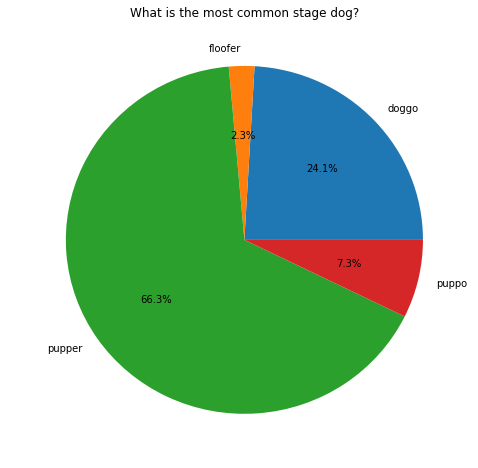

In [154]:
dog_stage_counts= twitter_archive_master.groupby('dog_stage')['dog_stage'].count()

#change the graph size
fig = plt.figure(figsize=(8,8))

#change the labels to stage names 
dog_stage_counts.plot.pie(autopct='%.1f%%',labels=['doggo','floofer','pupper','puppo'])

plt.ylabel(' ')
plt.title('What is the most common stage dog?')

In [72]:
#bar_plt function to help in bar plot creation
def bar_plt(number_of_bars, mean ,colors,locations,labels,xlabel,ylabel,title):
    
    #create bars
    for i in range(number_of_bars):
        f_bars = plt.bar(i , mean[i], color=colors[i])
        
    # xtick labels
    plt.xticks(locations, labels)
    
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    return

dog_stage
doggo      6941.452055
floofer    4968.714286
pupper     2382.502488
puppo      6473.954545
Name: retweet_count, dtype: float64

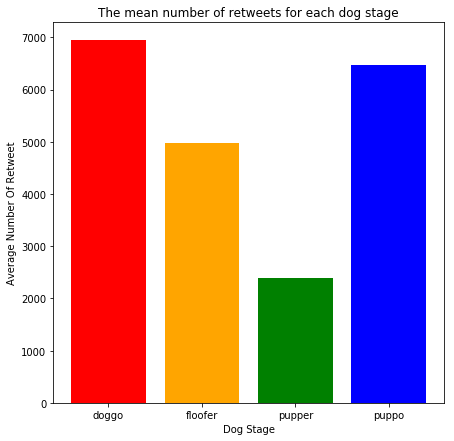

In [74]:
mean_r=twitter_archive_master.groupby(['dog_stage'])['retweet_count'].mean()
#initialize title and labels
title= ("The mean number of retweets for each dog stage")
COLUMNS=['doggo','floofer','pupper','puppo']   
#change the size of plot
fig = plt.figure(figsize=(7,7))

#call bar_plt function to create the graph
bar_plt(4, mean_r ,['r','orange','g','b'],[0,1,2,3],COLUMNS,"Dog Stage","Average Number Of Retweet",title)
mean_r

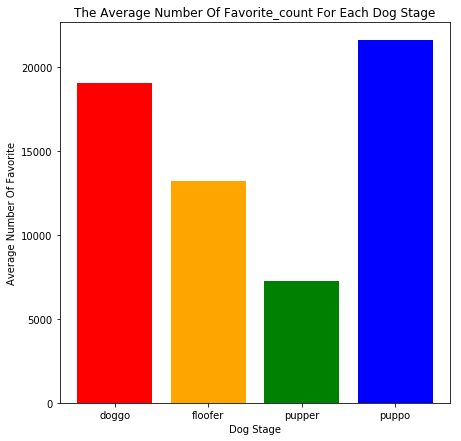

In [75]:
mean_v=twitter_archive_master.groupby(['dog_stage'])['favorite_count'].mean()
#initialize title 
title= ("The Average Number Of Favorite_count For Each Dog Stage")
#change the size of plot
fig = plt.figure(figsize=(7,7))

#call bar_plt function to create the graph
bar_plt(4, mean_v ,['r','orange','g','b'],[0,1,2,3],COLUMNS,"Dog Stage","Average Number Of Favorite",title)


In [138]:
from IPython.display import Image
from IPython.core.display import HTML 



max_v= twitter_archive_master.favorite_count.max()
im_url= twitter_archive_master[twitter_archive_master['favorite_count']==max_v]['jpg_url']
print ('the image with the highest favorite_count :')
Image(url= "https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg",width=250, height=250)





the image with the highest favorite_count :


In [151]:
max_r= twitter_archive_master.rating_numerator.max()
im_url= twitter_archive_master[twitter_archive_master['rating_numerator']==max_r]['jpg_url']
print ('the image with the highest rating_numerator:')
Image(url= "https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg",width=250, height=250)

the image with the highest rating_numerator:


### insights
- The most common dog stage is pupper.
- the least common dog stage is floofer.
- the dog stage of the tweet with the highest average retweet count is doggo.
- the dog stage of the tweet with the highest average favorite count is puppo.
- the maximum rating_numerator is 1776.
- the average rating_numerator is 12.223237.